<a href="https://colab.research.google.com/github/BrouthenKamel/Text-Classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing needed modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
data_url = "https://drive.google.com/file/d/1YByxDNQoDFbLIwNtA9nEEDfG7fFB4zjT/view?usp=share_link"
data_path = "/content/text_topics.csv"

In [3]:
data = pd.read_csv(data_path)

### Discovering the dataset

In [4]:
data.head()

,text,date,topics,id
0,Barbara Bailey is the queen of broadcast news ...,2020-09-04,['film_tv_&_video' 'news_&_social_concern'],1301943102094139393
1,start the 20-21 school year off POSITIVE! let’...,2020-09-05,['diaries_&_daily_life' 'youth_&_student_life'],1302275052256342017
2,Worth watching at least the 1st 10mins if I wa...,2020-09-06,['film_tv_&_video' 'news_&_social_concern'],1302450647422259205
3,There s regular people and then there s {@Bail...,2020-09-06,['celebrity_&_pop_culture'],1302452496011595776
4,"Up with new grace, truly sorry on behalf of {@...",2020-09-06,['celebrity_&_pop_culture' 'fitness_&_health' ...,1302479114469867520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1505 non-null   object
 1   date    1505 non-null   object
 2   topics  1505 non-null   object
 3   id      1505 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 47.2+ KB


### Exploring the features

In [6]:
columns = data.columns
columns

Index(['text', 'date', 'topics', 'id'], dtype='object')

In [7]:
data['topics'].unique()

array(["['film_tv_&_video' 'news_&_social_concern']",
       "['diaries_&_daily_life' 'youth_&_student_life']",
       "['celebrity_&_pop_culture']",
       "['celebrity_&_pop_culture' 'fitness_&_health' 'news_&_social_concern']",
       "['news_&_social_concern' 'sports']", "['film_tv_&_video']",
       "['arts_&_culture' 'learning_&_educational']",
       "['business_&_entrepreneurs' 'fashion_&_style' 'other_hobbies']",
       "['celebrity_&_pop_culture' 'music']",
       "['diaries_&_daily_life' 'news_&_social_concern' 'other_hobbies']",
       "['business_&_entrepreneurs' 'other_hobbies']", "['sports']",
       "['arts_&_culture' 'fashion_&_style']",
       "['diaries_&_daily_life' 'news_&_social_concern']",
       "['diaries_&_daily_life']",
       "['celebrity_&_pop_culture' 'film_tv_&_video']",
       "['gaming' 'sports']", "['business_&_entrepreneurs']", "['music']",
       "['diaries_&_daily_life' 'fashion_&_style']",
       "['celebrity_&_pop_culture' 'news_&_social_concern']

### Constructing the target vector

In [10]:
labels = []

In [12]:
for label in data['topics'].values:
  label_string = label[1:-1].replace('\n', '')
  #print(label_string)
  label_list = [ category[1:-1] for category in label_string.split() ]
  labels.append(label_list)

In [13]:
len(labels)

1505

In [14]:
frequencies = dict()
for label_list in labels:
  for label in label_list:
    if label not in frequencies.keys():
      frequencies[label] = 1
    else:
      frequencies[label] += 1

In [15]:
frequencies = dict(sorted(frequencies.items(), key=lambda x: x[1], reverse=True))

In [16]:
frequencies

{'sports': 532,
 'music': 362,
 'news_&_social_concern': 289,
 'film_tv_&_video': 231,
 'celebrity_&_pop_culture': 210,
 'diaries_&_daily_life': 135,
 'business_&_entrepreneurs': 80,
 'other_hobbies': 70,
 'science_&_technology': 65,
 'gaming': 56,
 'relationships': 55,
 'fitness_&_health': 44,
 'arts_&_culture': 42,
 'fashion_&_style': 33,
 'family': 30,
 'learning_&_educational': 23,
 'food_&_dining': 22,
 'travel_&_adventure': 14,
 'youth_&_student_life': 11}

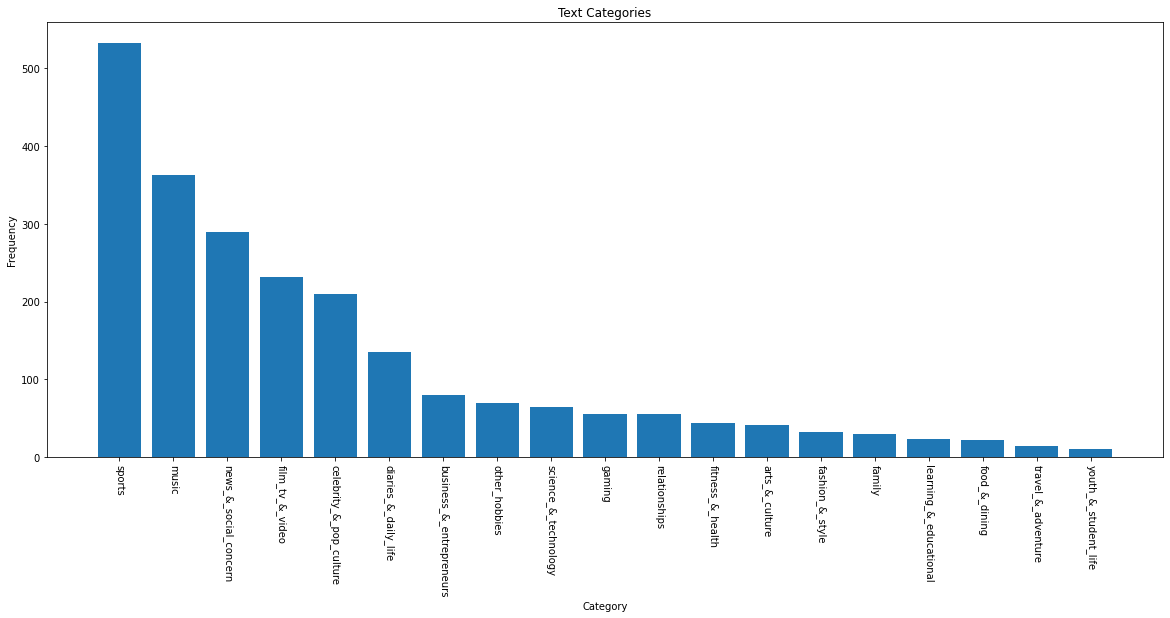

In [17]:
plt.figure(figsize=(20, 8))

plt.bar(frequencies.keys(), frequencies.values(), width=0.8)

plt.title('Text Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.xticks(rotation=-90)

plt.show()

In [19]:
topics_columns = dict()

for category in frequencies.keys():
  topic_column = []
  for data_point in labels:
    if category in data_point:
      topic_column.append(1)
    else:
      topic_column.append(0)
  topics_columns[category] = topic_column

In [ ]:
topics_columns

In [21]:
for category in frequencies.keys():
  data[category] = topics_columns[category]

In [23]:
data.columns

Index(['text', 'date', 'topics', 'id', 'sports', 'music',
       'news_&_social_concern', 'film_tv_&_video', 'celebrity_&_pop_culture',
       'diaries_&_daily_life', 'business_&_entrepreneurs', 'other_hobbies',
       'science_&_technology', 'gaming', 'relationships', 'fitness_&_health',
       'arts_&_culture', 'fashion_&_style', 'family', 'learning_&_educational',
       'food_&_dining', 'travel_&_adventure', 'youth_&_student_life'],
      dtype='object')

### The new dataset

In [24]:
dataset = data.drop(columns = ['date', 'topics', 'id'] )

In [25]:
dataset

,text,sports,music,news_&_social_concern,film_tv_&_video,celebrity_&_pop_culture,diaries_&_daily_life,business_&_entrepreneurs,other_hobbies,science_&_technology,gaming,relationships,fitness_&_health,arts_&_culture,fashion_&_style,family,learning_&_educational,food_&_dining,travel_&_adventure,youth_&_student_life
0,Barbara Bailey is the queen of broadcast news ...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,start the 20-21 school year off POSITIVE! let’...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Worth watching at least the 1st 10mins if I wa...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,There s regular people and then there s {@Bail...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Up with new grace, truly sorry on behalf of {@...",0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Why don t I like {@James Corden@} #JamesCorden...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1501,HATS off to {@Jim Cantore@} and {@The Weather ...,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1502,The truth is the love is real..Even if everyon...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1503,HMU for Quality Assured Results; #essay due; #...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Data cleaning

In [34]:
dataset['text'].sample(n=10).values.tolist()

['on {@YouTube@} : The Field (feat. Bino Rideaux & Young Dolph) {{URL}}',
 '#TrishIntel w {@Trish Regan@} podcast via {@Spotify USA@} President Trump + First Lady Melania have #COVID19  Join us in wishing them both a speedy recovery {{URL}}',
 'The #Pirates celebrating the 50th anniversary of that 1971 World Series team had one of those games tonight. One of those games that get put into top 10 lists on . {{USERNAME}} it was incredible to witness and almost surreal. In a difficult season these games make summer fun!',
 'Drivers license by {@Olivia Rodrigo@} is so good!!!! Go stream if you haven’t!!! Masterpiece.',
 'Human birth is to liberate oneself from the birth cycle and to attain ultimate salvation. It is possible by meditating the holy divine words. So, Spend your Sunday in God s remembrance and make it #SpiritualSunday {@DSS News and Updates@} {{URL}} ',
 'Singer, writer and producer = MORISSETTE AMON.   MORISSETTE NEW MUSIC {{USERNAME}} LYS TEASER RELEASE {{URL}} ',
 'Monday’s 

In [30]:
import re
import string

In [48]:
def remove_tag(text):
    url = re.compile(r"({.*?}|\{\{.*?\}\})")
    return url.sub(r"", text)

In [49]:
dataset['clean_text'] = dataset["text"].apply(remove_tag)

In [50]:
dataset['clean_text'].sample(n=10).values.tolist()

['BTS (방탄소년단)  Permission to Dance  Official MV } a través de youtube ',
 'Finally } } I finished ff14 what an amazing ride from AAR to Shadowbringers the story’s and characters are some of the best I experienced in gaming, and I’m glad y’all got me back into it thank you .',
 'Stanley Cup Final: The Tampa Bay Lightning Must Regroup Following Game 1 Loss to the Dallas Stars .... by } }',
 'I’m finding  to be much worse without } and still don’t understand why he was banned. Cc. ',
 'Jihoon blue hair Jihoon forehead Jihoon specs Jihoon turtle neck  TALENTED MC JIHOON  #ProIdolMCJihoon #지훈 #트레저 ',
 'I can’t recall a year I have chased both Christmas Eve and New Years Eve in the same year. } and I were chasing Christmas Eve tornado in Mobile, AL about 8 years ago during an El Niño winter. Never stop chasing',
 'Huge thanks to } for spinning “Eating Up The Sky” on his New Music Fix show on  last night ! ❤️❤️❤️❤️ }',
 'I see  also felt the Astros presence in 2020 was an insufferable burden 

In [51]:
dataset[["text", "clean_text"]].sample(n=1).values.tolist()

[['#Nadal #BarcelonaOpen   Congrats {@Rafa Nadal@} {@Stefanos Tsitsipas@} threw everything he had at Nadal, but the King of Clay won t be denied!',
  '#Nadal #BarcelonaOpen   Congrats   threw everything he had at Nadal, but the King of Clay won t be denied!']]

In [52]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

In [54]:
dataset['clean_text'] = dataset["clean_text"].apply(remove_punct)

In [57]:
dataset[["clean_text"]].sample(n=3).values.tolist()

[['Dear   I love the album packs with photobooks photocards  all the extras But it would be cool if you had a full length LPVinyl Record for the next album Plus all those goodies that goes with an album Just a Thought vinylcollector SmoothLikeButter BTSBUTTER'],
 ['I know I missed tbtbut this  is throw back to the last time the Lightning were in the Stanley Cup Later won it  gobolts  '],
 ['99100 people made it into the top 100 for FaZe5 I have been waiting so long and been anxiously refreshing  twitter I have been grinding for 3 years Please help me reach my dream Thanks and good luck to everyone Hopefully I wake up to the news that I made it']]

In [58]:
dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')

<ipython-input-58-f0fe9302765c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['clean_text'].str.replace('[\[\]]', '')


In [75]:
dataset["clean_text"].sample(n=2).values

array(['Sure the Super Bowl just ended but both the Bucs and Chiefs are going to start looking towards next year and how they can improve their rosters even further   ',
       'Kpop MVs that have reach 11M likes on Youtube   12   6   1 AgustD 1  Last Kpop MV that have reach 11M likes BTS  Permission to Dance '],
      dtype=object)

In [76]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop

In [80]:
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [81]:
dataset['reduced_text'] = dataset["clean_text"].apply(remove_stopwords)

In [93]:
dataset["reduced_text"].sample(n=4).values

array(['like format love prime time spot think should’ve put biffles tires start car would little fair field came last lead 15 laps but… can’t take away local … he’s doin great srxracing',
       'manchester red beautiful fans ggmu mcimun mufc manchesterderby',
       'relaxing music video meditation music video calm music stress via relaxingmusic meditationmusic sleepingmusic stressreliefmusic videos please visit youtube channel subscribe',
       'listen story bmf rise fall big meech black mafia family spotifyalbum6pjzjgbr3a19nlhlilnoqw'],
      dtype=object)

In [102]:
dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')

<ipython-input-102-c0916d6bb42c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_text'] = dataset['reduced_text'].str.replace(r'[^a-zA-Z ]', '')


In [103]:
dataset['clean_text']

0       barbara bailey queen broadcast news central ea...
1       start  school year positive lets start thread ...
2       worth watching least st mins minister love  of...
3                         regular people queen everything
4       new grace truly sorry behalf dont endorse bad ...
                              ...                        
1500                 like jamescorden someone help figure
1501    hats team field tracking hurricaneida keeping ...
1502    truth love realeven everyone gangs yougod isnt...
1503    hmu quality assured results essay due pay writ...
1504    thinking everyone idas path friends please sta...
Name: clean_text, Length: 1505, dtype: object

### Tokenization

In [104]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter = counter_word(dataset["clean_text"])

In [105]:
len(counter)

7371

In [106]:
counter.most_common(30)

[('via', 213),
 ('new', 180),
 ('music', 131),
 ('love', 101),
 ('video', 89),
 ('like', 81),
 ('time', 76),
 ('one', 74),
 ('game', 69),
 ('team', 68),
 ('get', 68),
 ('great', 67),
 ('good', 66),
 ('see', 66),
 ('day', 65),
 ('year', 64),
 ('please', 63),
 ('us', 61),
 ('next', 61),
 ('today', 61),
 ('win', 58),
 ('first', 58),
 ('song', 58),
 ('watch', 56),
 ('really', 56),
 ('im', 54),
 ('go', 54),
 ('make', 53),
 ('back', 51),
 ('happy', 51)]